<div style="display: flex; background-color: RGB(255,114,0);" >

# PROJET - Bonheur World <mark>Construction du DATASET complet</mark>
</div>

<div style="display: flex; background-color: Green; padding: 7px;" >

### 1.2. Description du notebook
</div>

Ce note book, aggrège les données de plusieurs sources :
- data_set_countries_clean => Liste des pays et les informations correspondantes
- evolution_score_altasocio_2022-04-01 => Evolution des scores de bonheur, informations scrappées sur le site internet
- evolution_score_official_2022-04-07 => Historique officiel des scores, téléchargé sur le site officiel
- Rapport-bonheur-2019 => fichier reçu en entrée du projet
- Rapport-bonheur-2020 à 2022 => fichiers téléchargés sur le site officiel
- world_Annual Sunshine => données relatives à l'ensoleillement par pays => Objectif voir si le soleil a un effet sur le bonheur
- world_deaths_rural_urban => données relatives aux décès par pays
- world_divorces => données relatives aux divorces par pays
- world_GINI_by_Country => score GINI par pays
- world_Intentional homicide victims NB => Nombre d'homicides volontaires par pays
- world_Population => Population par pays
- world_Precipitations in million cubic metres => Précipitations par pays
- world_rate of Population connected to wastewater collecting system => Le ratio des populations par pays connectées à l'eau courante
- world_rate of Population connected to wastewater treatment => Le ratio des populations par pays connectées au tout à l'égout
- world_Rural population => nombre de population rurale
- world_Unemployment rate => taux de chômage par pays
- world_Urban population => nombre de population urbaine
- world_Women_Par_100_Men => nombre de femmes pour 100 hommes par pays

Ces données ont été téléchargées sur les sites  : 
- http://data.un.org/Explorer.aspx 
- https://data.worldbank.org/indicator/SI.POV.GINI


In [1]:
from os import getcwd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import csv
from bonheur_bed_ara import *
from IPython.core.display import HTML
import plotly.express as px

<div style="display: flex; background-color: Blue; padding: 15px;" >

## 2.Chargement des données
</div>

In [2]:
# ---------------------------------------------------------------------------------------------
#                               MAIN
# ---------------------------------------------------------------------------------------------
verbose = False
force_reloading = True

# Récupère le répertoire du programme
file_path = getcwd() + "\\"
data_set_path = file_path + "dataset\\"
country_col_name = "country"
country_official_col_name = "country_official"

print(f"Current execution path : {file_path}")
print(f"Dataset path : {data_set_path}")

Current execution path : c:\Users\User\WORK\workspace-ia\PROJETS\projet_bonheur_bed\
Dataset path : c:\Users\User\WORK\workspace-ia\PROJETS\projet_bonheur_bed\dataset\


<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.1. Données pays
</div>

Le code continent `NA` pour `North America` est interprété comme un NAN, il faut donc en tenir compte au chargement des données.

In [3]:
pays_file_name = "data_set_countries_clean.csv"
# Le code continent North American = NA était interprété en tant que NaN et non sa valeur
df_pays_origin = pd.read_csv(data_set_path+pays_file_name, quoting=csv.QUOTE_NONNUMERIC, na_values=["", np.nan], keep_default_na=False, sep=',')
df_pays_origin = df_pays_origin.sort_values(by=country_col_name)
df_pays_origin["id"] = df_pays_origin["id"].fillna(-1)
df_pays_origin["id"] = df_pays_origin["id"].astype(int)
df_pays_origin = df_pays_origin.reset_index()
df_pays_origin = df_pays_origin.drop("index", axis=1)

print(f"{df_pays_origin.shape} données chargées ------> {list(df_pays_origin.columns)}")
df_pays_origin.head()

(213, 8) données chargées ------> ['id', 'alpha3', 'alpha2', 'country', 'country_official', 'continent_code', 'latitude', 'longitude']


,id,alpha3,alpha2,country,country_official,continent_code,latitude,longitude
0,4,AFG,AF,Afghanistan,Islamic Republic of Afghanistan,AS,29.276770,42.274721
1,8,ALB,AL,Albania,Republic of Albania,EU,21.483333,36.066667
2,12,DZA,DZ,Algeria,People's Democratic Republic of Algeria,AF,14.349729,43.892024
3,24,AGO,AO,Angola,Republic of Angola,AF,41.795972,12.235112
4,10,ATA,AQ,Antarctica,Antarctica,NaN,-22.016981,-47.920533


In [4]:
df_pays_origin.dtypes

id                    int32
alpha3               object
alpha2               object
country              object
country_official     object
continent_code       object
latitude            float64
longitude           float64
dtype: object

In [5]:
df_pays_origin.describe(include="all")

,id,alpha3,alpha2,country,country_official,continent_code,latitude,longitude
count,213.000000,213,213,213,213,210,191.000000,191.000000
unique,NaN,212,213,213,213,10,NaN,NaN
top,NaN,EU,AF,Afghanistan,Islamic Republic of Afghanistan,AF,NaN,NaN
freq,NaN,2,1,1,1,55,NaN,NaN
mean,338.938967,NaN,NaN,NaN,NaN,NaN,24.756859,20.037242
std,281.280111,NaN,NaN,NaN,NaN,NaN,25.161264,61.067684
min,-1.000000,NaN,NaN,NaN,NaN,NaN,-49.349365,-149.400973
25%,56.000000,NaN,NaN,NaN,NaN,NaN,13.221475,-1.687314
50%,320.000000,NaN,NaN,NaN,NaN,NaN,31.947351,18.935401
75%,578.000000,NaN,NaN,NaN,NaN,NaN,45.802856,46.317013


In [6]:
df_pays_origin[df_pays_origin["alpha2"].duplicated()]

,id,alpha3,alpha2,country,country_official,continent_code,latitude,longitude


In [7]:
# correction des doublons
df_pays_origin.loc[df_pays_origin["alpha3"]=="NAM", "alpha2"] = "NA"
df_pays_origin = df_pays_origin.drop_duplicates(subset=["alpha2"], keep="first")
print(df_pays_origin[df_pays_origin["alpha2"].duplicated()].shape)
df_pays_origin[(df_pays_origin["alpha2"]=="SO") | (df_pays_origin["alpha2"]=="CY")| (df_pays_origin["alpha3"]=="NAM")]

(0, 8)


,id,alpha3,alpha2,country,country_official,continent_code,latitude,longitude
41,196,CYP,CY,Cyprus,Republic of Cyprus,AS,34.683875,32.605168
125,516,NAM,NA,Namibia,Republic of Namibia,AF,34.530234,69.230180
171,706,SOM,SO,Somalia,Federal Republic of Somalia,AF,11.795646,41.012891


In [8]:
df_pays_origin[df_pays_origin["alpha3"].duplicated()]

,id,alpha3,alpha2,country,country_official,continent_code,latitude,longitude
210,-1,EU,YU,Yugoslavia,Yugoslavia,YUG,NaN,NaN


In [9]:
print(df_pays_origin[df_pays_origin["alpha3"].duplicated()].shape)
df_pays_origin[df_pays_origin["alpha3"]=="-99"]

(1, 8)


,id,alpha3,alpha2,country,country_official,continent_code,latitude,longitude


In [10]:
df_pays_origin.loc[df_pays_origin["alpha3"]=="-99", "alpha3"] = np.nan
print(df_pays_origin[df_pays_origin["alpha3"].duplicated()].shape)
df_pays_origin[df_pays_origin["alpha3"].duplicated()]

(1, 8)


,id,alpha3,alpha2,country,country_official,continent_code,latitude,longitude
210,-1,EU,YU,Yugoslavia,Yugoslavia,YUG,NaN,NaN


<div style="display: flex; background-color: indigo;" >

#### 2.1.3 Visualisation
</div>

In [11]:
df_pays_origin = df_pays_origin.rename(columns={"id":"id_country"})
df_pays_origin.columns

Index(['id_country', 'alpha3', 'alpha2', 'country', 'country_official',
       'continent_code', 'latitude', 'longitude'],
      dtype='object')

In [12]:
print(df_pays_origin.shape)
df_pays_origin.describe(include="all")

(213, 8)


,id_country,alpha3,alpha2,country,country_official,continent_code,latitude,longitude
count,213.000000,213,213,213,213,210,191.000000,191.000000
unique,NaN,212,213,213,213,10,NaN,NaN
top,NaN,EU,AF,Afghanistan,Islamic Republic of Afghanistan,AF,NaN,NaN
freq,NaN,2,1,1,1,55,NaN,NaN
mean,338.938967,NaN,NaN,NaN,NaN,NaN,24.756859,20.037242
std,281.280111,NaN,NaN,NaN,NaN,NaN,25.161264,61.067684
min,-1.000000,NaN,NaN,NaN,NaN,NaN,-49.349365,-149.400973
25%,56.000000,NaN,NaN,NaN,NaN,NaN,13.221475,-1.687314
50%,320.000000,NaN,NaN,NaN,NaN,NaN,31.947351,18.935401
75%,578.000000,NaN,NaN,NaN,NaN,NaN,45.802856,46.317013


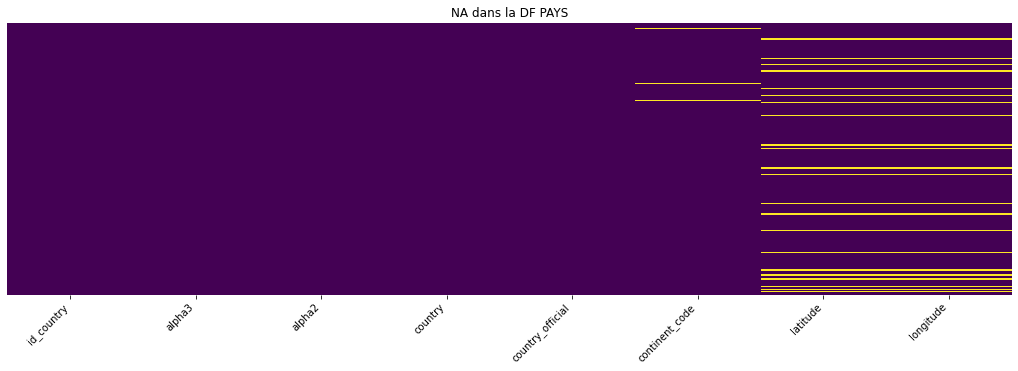

In [13]:
figure, ax = color_graph_background(1,1)
sns.heatmap(df_pays_origin.isnull(), yticklabels=False,cbar=False, cmap='viridis')
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("NA dans la DF PAYS")
figure.set_size_inches(18, 5, forward=True)
plt.show()

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.2. Evolution des scores
</div>

In [14]:
data_evolution_name = "evolution_score_altasocio_2022-04-01.csv"
df_evolution_orgin = pd.read_csv(data_set_path+data_evolution_name, sep=',')
df_evolution_orgin = df_evolution_orgin.rename(columns={"pays":country_col_name})
df_evolution_orgin = df_evolution_orgin.sort_values(by=country_col_name)

# correction des types
df_evolution_orgin = df_correct_type_to_float(df_evolution_orgin, exclude_cols=[country_col_name])

print(f"{df_evolution_orgin.shape} données chargées ------> {list(df_evolution_orgin.columns)}")
df_evolution_orgin.head()

(165, 8) données chargées ------> ['country', 'score_2015', 'score_2016', 'score_2017', 'score_2018', 'score_2019', 'score_2020', 'country_official']


,country,score_2015,score_2016,score_2017,score_2018,score_2019,score_2020,country_official
164,Afghanistan,3.575,3.360,3.794,3.632,3.203,2.567,Islamic Republic of Afghanistan
115,Afrique du Sud,4.642,4.459,4.829,4.724,4.722,4.814,Republic of South Africa
111,Albanie,4.959,4.655,4.644,4.586,4.719,4.883,Republic of Albania
106,Algérie,5.605,6.355,5.872,5.295,5.211,5.005,People's Democratic Republic of Algeria
16,Allemagne,6.750,6.994,6.951,6.965,6.985,7.076,Federal Republic of Germany


<div style="display: flex; background-color: indigo;" >

#### 2.1.2 Visualisation
</div>

In [15]:
df_evolution_orgin.head()

,country,score_2015,score_2016,score_2017,score_2018,score_2019,score_2020,country_official
164,Afghanistan,3.575,3.360,3.794,3.632,3.203,2.567,Islamic Republic of Afghanistan
115,Afrique du Sud,4.642,4.459,4.829,4.724,4.722,4.814,Republic of South Africa
111,Albanie,4.959,4.655,4.644,4.586,4.719,4.883,Republic of Albania
106,Algérie,5.605,6.355,5.872,5.295,5.211,5.005,People's Democratic Republic of Algeria
16,Allemagne,6.750,6.994,6.951,6.965,6.985,7.076,Federal Republic of Germany


In [16]:
df_evolution_orgin = df_evolution_orgin.rename(columns={"pays":"country"})
df_evolution_orgin.columns

Index(['country', 'score_2015', 'score_2016', 'score_2017', 'score_2018',
       'score_2019', 'score_2020', 'country_official'],
      dtype='object')

In [17]:
df_evolution_orgin.describe(include="all")

,country,score_2015,score_2016,score_2017,score_2018,score_2019,score_2020,country_official
count,165,158.000000,157.000000,155.000000,156.000000,156.000000,153.000000,165
unique,165,NaN,NaN,NaN,NaN,NaN,NaN,162
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,Federal Republic of Somalia
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,2
mean,NaN,5.375778,5.382185,5.367619,5.375917,5.407032,5.473255,NaN
std,NaN,1.144889,1.141674,1.142394,1.119506,1.113085,1.112288,NaN
min,NaN,2.839000,2.905000,2.693000,2.905000,2.853000,2.567000,NaN
25%,NaN,4.526000,4.404000,4.505500,4.453750,4.544500,4.724000,NaN
50%,NaN,5.232500,5.314000,5.293000,5.378000,5.379500,5.515000,NaN
75%,NaN,6.243750,6.269000,6.136500,6.168500,6.184500,6.228000,NaN


In [18]:
df_evolution_orgin.dtypes

country              object
score_2015          float64
score_2016          float64
score_2017          float64
score_2018          float64
score_2019          float64
score_2020          float64
country_official     object
dtype: object

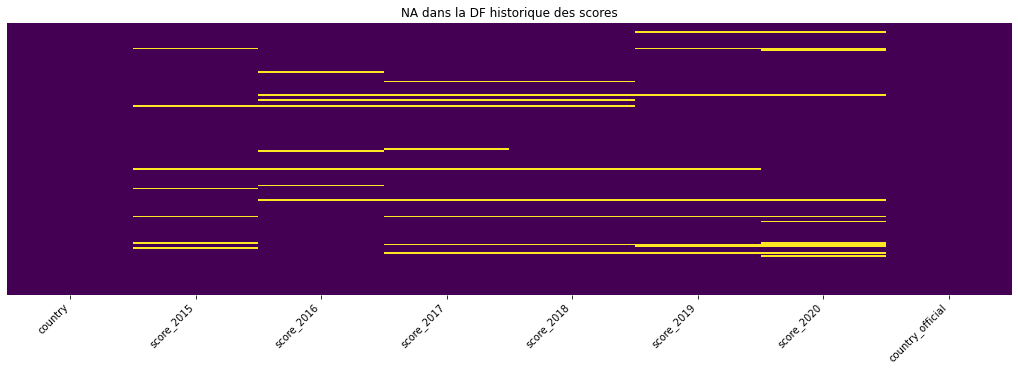

In [19]:
figure, ax = color_graph_background(1,1)
sns.heatmap(df_evolution_orgin.isnull(), yticklabels=False,cbar=False, cmap='viridis')
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("NA dans la DF historique des scores")
figure.set_size_inches(18, 5, forward=True)
plt.show()

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.3. Evolution Officielle des scores
</div>

https://worldhappiness.report

Depuis le site officiel : https://happiness-report.s3.amazonaws.com/2021/DataPanelWHR2021C2.xls

In [20]:
data_evolution_officiel_name = "evolution_score_official_2022-04-07.csv"
df_evolution_officiel_orgin = pd.read_csv(data_set_path+data_evolution_officiel_name, sep=',')
df_evolution_officiel_orgin = df_evolution_officiel_orgin.rename(columns={"Country name":country_col_name,
                                                                          "Log GDP per capita":"PIB",
                                                                          "Social support":"Soutien",
                                                                          "Healthy life expectancy at birth":"Esperance vie BS",
                                                                          "Freedom to make life choices":"Liberte des choix de vie",
                                                                          "Generosity":"Generosite",
                                                                          "Perceptions of corruption":"Corruption",
                                                                          "Life Ladder":"score"})
df_evolution_officiel_orgin = df_evolution_officiel_orgin.sort_values(by=[country_col_name, "year"])

# correction des types
df_evolution_officiel_orgin = df_correct_type_to_float(df_evolution_officiel_orgin, exclude_cols=[country_col_name, country_official_col_name])

print(f"{df_evolution_officiel_orgin.shape} données chargées ------> {list(df_evolution_officiel_orgin.columns)}")
df_evolution_officiel_orgin.head()

(1949, 11) données chargées ------> ['country', 'year', 'score', 'PIB', 'Soutien', 'Esperance vie BS', 'Liberte des choix de vie', 'Generosite', 'Corruption', 'Positive affect', 'Negative affect']


,country,year,score,PIB,Soutien,Esperance vie BS,Liberte des choix de vie,Generosite,Corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [21]:
# Complément du nom officiel du pays
df_evolution_officiel_completed = complete_df_with_country_datas(df_evolution_officiel_orgin, country_col_name=country_col_name, verbose=0)
df_evolution_officiel_completed = df_evolution_officiel_completed[['country_official', 'country', 'year', 'score', 'PIB', 'Soutien',
       'Esperance vie BS', 'Liberte des choix de vie', 'Generosite','Corruption']]
# correction des types
print(df_evolution_officiel_completed.shape)
df_evolution_officiel_completed[country_official_col_name].isna().sum()

(1949, 10)


0

In [22]:
df_evolution_officiel_completed[df_evolution_officiel_completed[country_col_name] == df_evolution_officiel_completed[country_official_col_name]]

,country_official,country,year,score,PIB,Soutien,Esperance vie BS,Liberte des choix de vie,Generosite,Corruption
66,Australia,Australia,2005,7.341,10.659,0.968,71.40,0.935,NaN,0.390
67,Australia,Australia,2007,7.285,10.703,0.965,71.72,0.891,0.347,0.513
68,Australia,Australia,2008,7.254,10.719,0.947,71.88,0.916,0.305,0.431
69,Australia,Australia,2010,7.450,10.722,0.955,72.20,0.932,0.317,0.366
70,Australia,Australia,2011,7.406,10.733,0.967,72.30,0.945,0.369,0.382
...,...,...,...,...,...,...,...,...,...,...
1816,United Arab Emirates,United Arab Emirates,2016,6.831,11.105,0.849,66.70,0.949,0.131,NaN
1817,United Arab Emirates,United Arab Emirates,2017,7.039,11.115,0.836,66.90,0.962,0.216,NaN
1818,United Arab Emirates,United Arab Emirates,2018,6.604,11.112,0.851,67.10,0.944,0.054,NaN
1819,United Arab Emirates,United Arab Emirates,2019,6.711,11.114,0.862,67.30,0.911,0.129,NaN


<div style="display: flex; background-color: indigo;" >

#### 2.1.2 Visualisation
</div>

In [23]:
df_evolution_officiel_completed.head()

,country_official,country,year,score,PIB,Soutien,Esperance vie BS,Liberte des choix de vie,Generosite,Corruption
0,Islamic Republic of Afghanistan,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882
1,Islamic Republic of Afghanistan,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850
2,Islamic Republic of Afghanistan,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707
3,Islamic Republic of Afghanistan,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731
4,Islamic Republic of Afghanistan,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776


In [24]:
df_evolution_officiel_completed.describe(include="all")

,country_official,country,year,score,PIB,Soutien,Esperance vie BS,Liberte des choix de vie,Generosite,Corruption
count,1949,1949,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000
unique,163,166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Republic of Cyprus,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,20,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125
std,NaN,NaN,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789
min,NaN,NaN,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000
25%,NaN,NaN,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000
50%,NaN,NaN,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000
75%,NaN,NaN,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000


In [25]:
sorted(list(df_evolution_officiel_completed["year"].unique()))

[2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]

In [26]:
df_evolution_officiel_completed.isna().sum()

country_official              0
country                       0
year                          0
score                         0
PIB                          36
Soutien                      13
Esperance vie BS             55
Liberte des choix de vie     32
Generosite                   89
Corruption                  110
dtype: int64

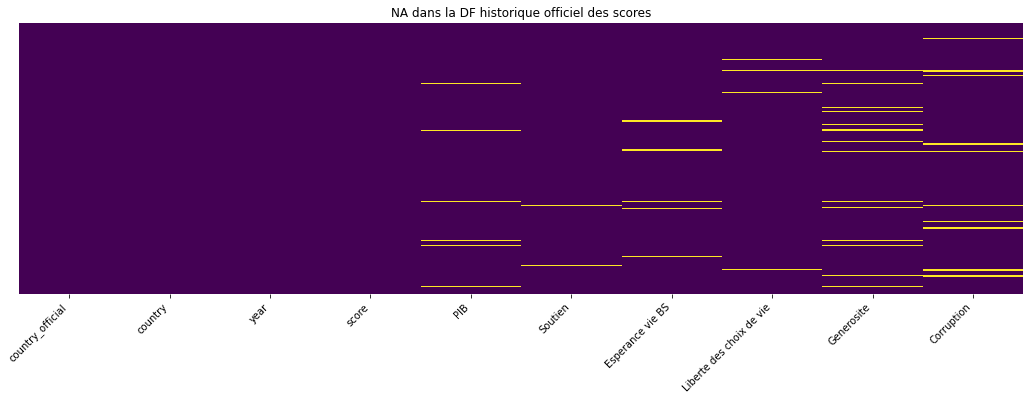

In [27]:
figure, ax = color_graph_background(1,1)
sns.heatmap(df_evolution_officiel_completed.isnull(), yticklabels=False,cbar=False, cmap='viridis')
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("NA dans la DF historique officiel des scores")
figure.set_size_inches(18, 5, forward=True)
plt.show()

In [28]:
df_evolution_officiel_completed.dtypes

country_official             object
country                      object
year                          int64
score                       float64
PIB                         float64
Soutien                     float64
Esperance vie BS            float64
Liberte des choix de vie    float64
Generosite                  float64
Corruption                  float64
dtype: object

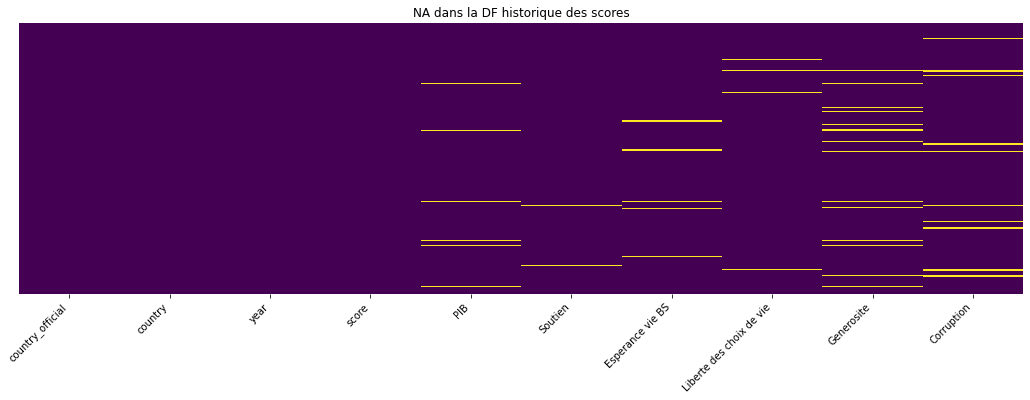

In [29]:
figure, ax = color_graph_background(1,1)
sns.heatmap(df_evolution_officiel_completed.isnull(), yticklabels=False,cbar=False, cmap='viridis')
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("NA dans la DF historique des scores")
figure.set_size_inches(18, 5, forward=True)
plt.show()

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.3. Détails des scores
</div>

In [30]:
score_dataset_filenames = []
score_rapport_with ="Rapport-bonheur-"

world_datas_files = []
world_start_with ="world_"

# récupération données
extensions = [".csv"]

for ext in extensions:
    score_dataset_filenames.extend(get_dir_files(data_set_path, start_with=score_rapport_with , endwith=ext))
    world_datas_files.extend(get_dir_files(data_set_path, start_with=world_start_with , endwith=ext))

print(f"{len(score_dataset_filenames)} Fichiers score à traiter et {len(world_datas_files)} Fichiers monde à traiter")

4 Fichiers score à traiter et 13 Fichiers monde à traiter


In [31]:
# verbose = 1
_, df_origine_by_line, _ = load_scores_files(score_dataset_filenames, data_set_path, country_col_name = country_col_name,country_official_name = country_official_col_name, score_rapport_with=score_rapport_with, verbose=verbose)
df_origine_by_line.head()

100%|██████████| 4/4 [00:00<00:00, 32.17it/s]


,country_official,country,rank,score,PIB,Soutien,Esperance vie BS,Liberte des choix de vie,Generosite,Corruption,country_origin,year,Regional indicator,Whisker-high,Whisker-low,Dystopia + residual
131,Arab Republic of Egypt,Egypt,NaN,4.283,9.367,0.750,61.998,0.749,-0.182,0.795,Egypt,2021.0,Middle East and North Africa,4.371,4.195,1.648
136,Arab Republic of Egypt,Egypt,137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Egypt,2019.0,NaN,NaN,NaN,NaN
128,Arab Republic of Egypt,Egypt,129.0,4.288,1.388,0.732,0.548,0.469,0.041,0.254,Egypt,2022.0,NaN,4.377,4.198,0.856
137,Arab Republic of Egypt,Egypt,NaN,4.151,9.317,0.735,61.780,0.708,-0.197,0.788,Egypt,2020.0,Middle East and North Africa,4.222,4.081,1.159
54,Argentine Republic,Argentina,NaN,5.975,9.811,0.901,68.804,0.831,-0.195,0.842,Argentina,2020.0,Latin America and Caribbean,6.079,5.870,2.073


- Une analyse des différences entre les noms de pays des différentes années a été faite pour uniformiser les données. (cf. annexe)
- Puis une fusion et suppression des colonnes inutiles des pays par années (avant de supprimer une vérification a été faite pour identifier les écarts (cf. annexe)

In [32]:
df_origine_by_line["year"] = df_origine_by_line["year"].astype(int)
df_origine_by_line.head()

,country_official,country,rank,score,PIB,Soutien,Esperance vie BS,Liberte des choix de vie,Generosite,Corruption,country_origin,year,Regional indicator,Whisker-high,Whisker-low,Dystopia + residual
131,Arab Republic of Egypt,Egypt,NaN,4.283,9.367,0.750,61.998,0.749,-0.182,0.795,Egypt,2021,Middle East and North Africa,4.371,4.195,1.648
136,Arab Republic of Egypt,Egypt,137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Egypt,2019,NaN,NaN,NaN,NaN
128,Arab Republic of Egypt,Egypt,129.0,4.288,1.388,0.732,0.548,0.469,0.041,0.254,Egypt,2022,NaN,4.377,4.198,0.856
137,Arab Republic of Egypt,Egypt,NaN,4.151,9.317,0.735,61.780,0.708,-0.197,0.788,Egypt,2020,Middle East and North Africa,4.222,4.081,1.159
54,Argentine Republic,Argentina,NaN,5.975,9.811,0.901,68.804,0.831,-0.195,0.842,Argentina,2020,Latin America and Caribbean,6.079,5.870,2.073


In [33]:
df_origine_by_line.dtypes

country_official             object
country                      object
rank                        float64
score                       float64
PIB                         float64
Soutien                     float64
Esperance vie BS            float64
Liberte des choix de vie    float64
Generosite                  float64
Corruption                  float64
country_origin               object
year                          int32
Regional indicator           object
Whisker-high                float64
Whisker-low                 float64
Dystopia + residual         float64
dtype: object

In [34]:
df_origine_by_line.describe(include="all")

,country_official,country,rank,score,PIB,Soutien,Esperance vie BS,Liberte des choix de vie,Generosite,Corruption,country_origin,year,Regional indicator,Whisker-high,Whisker-low,Dystopia + residual
count,597,597,299.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,443.000000,597,597.000000,298,443.000000,443.000000,443.000000
unique,156,163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163,NaN,10,NaN,NaN,NaN
top,Arab Republic of Egypt,Egypt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Egypt,NaN,Sub-Saharan Africa,NaN,NaN,NaN
freq,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,75,NaN,NaN,NaN
mean,NaN,NaN,75.916388,5.510989,6.747524,0.841968,43.647752,0.698255,0.037691,0.544479,NaN,2020.474037,NaN,5.624427,5.397542,2.082235
std,NaN,NaN,43.885869,1.088554,3.859714,0.192811,30.597451,0.178722,0.153607,0.315786,NaN,1.119419,NaN,1.070241,1.108101,0.600419
min,NaN,NaN,1.000000,2.404000,0.000000,0.000000,0.000000,0.000000,-0.301000,0.000000,NaN,2019.000000,NaN,2.469000,2.339000,0.187000
25%,NaN,NaN,38.000000,4.770500,1.806000,0.736000,0.730500,0.588000,-0.083500,0.184000,NaN,2019.000000,NaN,4.887000,4.645500,1.726500
50%,NaN,NaN,76.000000,5.534000,8.485000,0.855000,59.305000,0.719000,0.050000,0.684000,NaN,2020.000000,NaN,5.619000,5.423000,2.131000
75%,NaN,NaN,113.500000,6.260000,9.820000,0.935500,67.450500,0.843000,0.134000,0.821000,NaN,2021.000000,NaN,6.386000,6.145000,2.484500


In [35]:
df_origine_by_line.columns

Index(['country_official', 'country', 'rank', 'score', 'PIB', 'Soutien',
       'Esperance vie BS', 'Liberte des choix de vie', 'Generosite',
       'Corruption', 'country_origin', 'year', 'Regional indicator',
       'Whisker-high', 'Whisker-low', 'Dystopia + residual'],
      dtype='object')

In [36]:
df_origine_by_line = df_origine_by_line[['country_official', 'Regional indicator','country', 'country_origin','year', 'score', 'PIB', 'Soutien',
       'Esperance vie BS', 'Liberte des choix de vie', 'Generosite',
       'Corruption',  'Whisker-high', 'Whisker-low', 'Dystopia + residual','rank']]

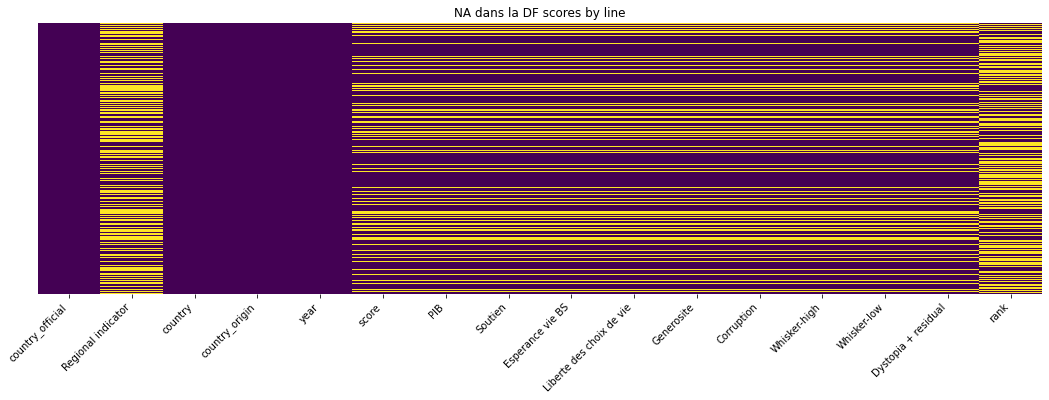

In [37]:
figure, ax = color_graph_background(1,1)
sns.heatmap(df_origine_by_line.isnull(), yticklabels=False,cbar=False, cmap='viridis')
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("NA dans la DF scores by line")
figure.set_size_inches(18, 5, forward=True)
plt.show()

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.4. Fusion Détails des scores et évolution des scores
</div>

<div style="display: flex; background-color: indigo;" >

#### 2.2.1. Fusion dataset source et données temporelles
</div>

<div style="display: flex; background-color: deeppink;" >

##### 2.2.1.x Fusion avec la DF historique officielle
</div>

In [38]:
df_evolution_orgin.columns

Index(['country', 'score_2015', 'score_2016', 'score_2017', 'score_2018',
       'score_2019', 'score_2020', 'country_official'],
      dtype='object')

In [39]:
df_light_completed_by_line_v1 = score_by_line_merge_official_historic(df_evolution_officiel_completed, df_origine_by_line, verbose=verbose)
df_light_completed_by_line_v1.head()

,country_official,country,year,score,PIB,Soutien,Esperance vie BS,Liberte des choix de vie,Generosite,Corruption,Regional indicator,country_origin,Whisker-high,Whisker-low,Dystopia + residual,rank
0,Arab Republic of Egypt,Egypt,2005,5.168,9.036,0.848,59.70,0.817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab Republic of Egypt,Egypt,2007,5.541,9.135,0.686,59.82,0.609,-0.121,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab Republic of Egypt,Egypt,2008,4.632,9.186,0.738,59.88,NaN,-0.087,0.914,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab Republic of Egypt,Egypt,2009,5.066,9.213,0.744,59.94,0.611,-0.100,0.801,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab Republic of Egypt,Egypt,2010,4.669,9.244,0.769,60.00,0.486,-0.076,0.826,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df_light_completed_by_line_v1.loc[df_light_completed_by_line_v1[['country_official', 'year']].duplicated(), 'year'].value_counts()

Series([], Name: year, dtype: int64)

In [41]:
df_light_completed_by_line_v1[(df_light_completed_by_line_v1['country_official']=="country_official") & (df_light_completed_by_line_v1['year']==2020)]

,country_official,country,year,score,PIB,Soutien,Esperance vie BS,Liberte des choix de vie,Generosite,Corruption,Regional indicator,country_origin,Whisker-high,Whisker-low,Dystopia + residual,rank


In [42]:
df_light_completed_by_line_v1[(df_light_completed_by_line_v1['year']==2020)]

,country_official,country,year,score,PIB,Soutien,Esperance vie BS,Liberte des choix de vie,Generosite,Corruption,Regional indicator,country_origin,Whisker-high,Whisker-low,Dystopia + residual,rank
14,Arab Republic of Egypt,Egypt,2020,4.151,9.317,0.735,61.780,0.708,-0.197,0.788,Middle East and North Africa,Egypt,4.222,4.081,1.159,NaN
31,Argentine Republic,Argentina,2020,5.975,9.811,0.901,68.804,0.831,-0.195,0.842,Latin America and Caribbean,Argentina,6.079,5.870,2.073,NaN
47,Australia,Australia,2020,7.223,10.721,0.945,73.605,0.915,0.190,0.415,North America and ANZ,Australia,7.305,7.141,2.130,NaN
66,Bolivarian Republic of Venezuela,Venezuela,2020,5.053,8.978,0.890,66.505,0.623,-0.169,0.837,Latin America and Caribbean,Venezuela,5.179,4.927,1.745,NaN
82,Burkina Faso,Burkina Faso,2020,4.769,7.469,0.713,53.889,0.666,-0.019,0.740,Sub-Saharan Africa,Burkina Faso,4.890,4.647,2.589,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2216,United Kingdom of Great Britain and Northern I...,United Kingdom,2020,7.165,10.600,0.937,72.302,0.835,0.264,0.436,Western Europe,United Kingdom,7.237,7.092,2.237,NaN
2233,United Mexican States,Mexico,2020,6.465,9.798,0.839,68.299,0.859,-0.175,0.807,Latin America and Caribbean,Mexico,6.559,6.371,2.663,NaN
2250,United Republic of Tanzania,Tanzania,2020,3.476,7.968,0.689,57.496,0.822,0.110,0.620,Sub-Saharan Africa,Tanzania,3.600,3.352,0.719,NaN
2267,United States of America,United States,2020,6.940,10.926,0.914,68.299,0.843,0.150,0.700,North America and ANZ,United States,7.032,6.847,2.344,NaN


<div style="display: flex; background-color: deeppink;" >

##### 2.2.1.x Fusion avec la DF historique scrappée
</div>

In [43]:
verbose = 1
df_light_completed_by_line = score_by_line_complete_with_historic_score(df_evolution_orgin, df_light_completed_by_line_v1, verbose=verbose)
# On complète la région
df_light_completed_by_line = fill_na_regional_indicator(df_light_completed_by_line, verbose=verbose)
print(df_light_completed_by_line.shape)
df_light_completed_by_line.head()

INPUT (2287, 16)  dont score NA : 0
OUTPUT (3222, 16)  dont score NA : 0
INPUT Regional indicator NA :  2924 => OUTPUT :  146
(3222, 16)


,country_official,country,year,score,PIB,Soutien,Esperance vie BS,Liberte des choix de vie,Generosite,Corruption,Regional indicator,country_origin,Whisker-high,Whisker-low,Dystopia + residual,rank
0,Arab Republic of Egypt,Egypt,2005,5.168,9.036,0.848,59.70,0.817,NaN,NaN,Middle East and North Africa,NaN,NaN,NaN,NaN,NaN
1,Arab Republic of Egypt,Egypt,2007,5.541,9.135,0.686,59.82,0.609,-0.121,NaN,Middle East and North Africa,NaN,NaN,NaN,NaN,NaN
2,Arab Republic of Egypt,Egypt,2008,4.632,9.186,0.738,59.88,NaN,-0.087,0.914,Middle East and North Africa,NaN,NaN,NaN,NaN,NaN
3,Arab Republic of Egypt,Egypt,2009,5.066,9.213,0.744,59.94,0.611,-0.100,0.801,Middle East and North Africa,NaN,NaN,NaN,NaN,NaN
4,Arab Republic of Egypt,Egypt,2010,4.669,9.244,0.769,60.00,0.486,-0.076,0.826,Middle East and North Africa,NaN,NaN,NaN,NaN,NaN


In [44]:
df_light_completed_by_line.loc[df_light_completed_by_line[['country_official', 'year']].duplicated(), 'year'].value_counts()

2020    141
2017    136
2019    133
2016    132
2015    131
2018    128
Name: year, dtype: int64

In [45]:
df_light_completed_by_line = score_by_line_clean_index_and_sort(df_light_completed_by_line, verbose=verbose)

Trie des données.... END


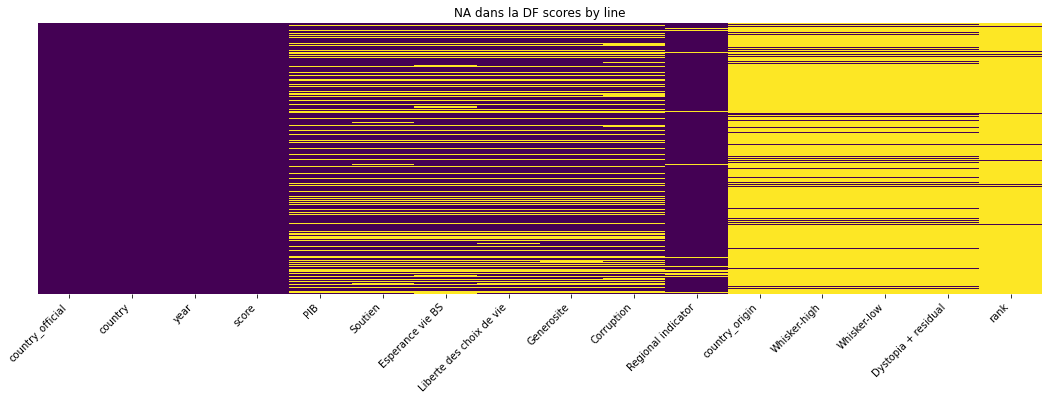

In [46]:
figure, ax = color_graph_background(1,1)
sns.heatmap(df_light_completed_by_line.isnull(), yticklabels=False,cbar=False, cmap='viridis')
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("NA dans la DF scores by line")
figure.set_size_inches(18, 5, forward=True)
plt.show()

<div style="display: flex; background-color: Green; padding: 7px;" >

### 2.4. Fusion Détails des scores et pays
</div>

In [47]:
# Correction éventuelle des pays 
df_light_completed_by_line = complete_df_with_country_datas(df_light_completed_by_line, country_col_name=country_col_name)

In [48]:
df_global = df_light_completed_by_line.merge(df_pays_origin, on='country_official', how="left", indicator=True)
df_global["_merge"].value_counts()

both          3222
left_only        0
right_only       0
Name: _merge, dtype: int64

In [49]:
# Nettoyage des colonnes inutiles
df_global = df_global.drop("_merge", axis=1)
df_global = df_global.drop("country_origin", axis=1)
df_global = df_global.drop("country_y", axis=1)
df_global = df_global.rename(columns={"country_x": country_col_name})
df_global.head()

,country_official,country,year,score,PIB,Soutien,Esperance vie BS,Liberte des choix de vie,Generosite,Corruption,...,Whisker-high,Whisker-low,Dystopia + residual,rank,id_country,alpha3,alpha2,continent_code,latitude,longitude
0,Arab Republic of Egypt,Egypt,2005,5.168,9.036,0.848,59.70,0.817,NaN,NaN,...,NaN,NaN,NaN,NaN,818,EGY,EG,AF,-5.135978,119.525419
1,Arab Republic of Egypt,Egypt,2007,5.541,9.135,0.686,59.82,0.609,-0.121,NaN,...,NaN,NaN,NaN,NaN,818,EGY,EG,AF,-5.135978,119.525419
2,Arab Republic of Egypt,Egypt,2008,4.632,9.186,0.738,59.88,NaN,-0.087,0.914,...,NaN,NaN,NaN,NaN,818,EGY,EG,AF,-5.135978,119.525419
3,Arab Republic of Egypt,Egypt,2009,5.066,9.213,0.744,59.94,0.611,-0.100,0.801,...,NaN,NaN,NaN,NaN,818,EGY,EG,AF,-5.135978,119.525419
4,Arab Republic of Egypt,Egypt,2010,4.669,9.244,0.769,60.00,0.486,-0.076,0.826,...,NaN,NaN,NaN,NaN,818,EGY,EG,AF,-5.135978,119.525419


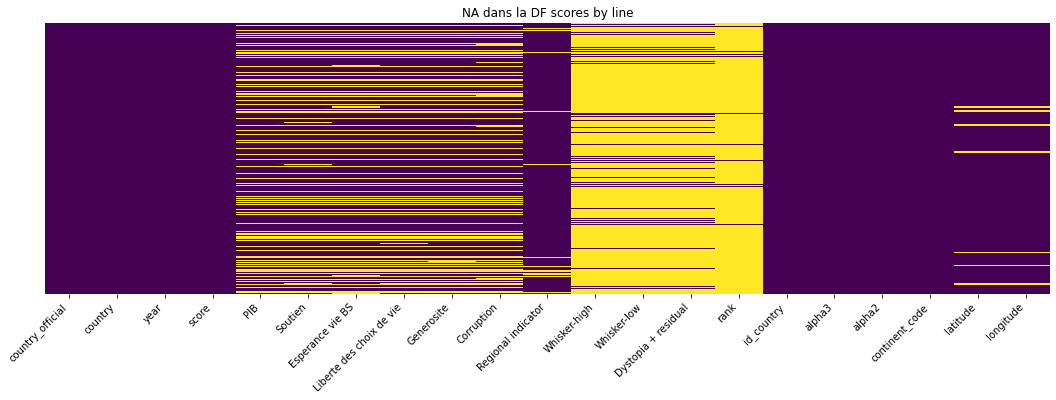

In [50]:
figure, ax = color_graph_background(1,1)
sns.heatmap(df_global.isnull(), yticklabels=False,cbar=False, cmap='viridis')
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("NA dans la DF scores by line")
figure.set_size_inches(18, 5, forward=True)
plt.show()

In [51]:
import sys
sys.path.append("C:\\Users\\User\\WORK\\workspace-ia\\PERSO\\")
sys.path.append("C:\\Users\\User\\WORK\\workspace-ia\\PERSO\\ara_commons\\")
from ara_commons.ara_df import remove_na_columns, save_df_in_file

In [52]:
df_global_clean = remove_na_columns(df_global, max_na=80, verbose=verbose, inplace=False)

0 => 8 ['country_official', 'country', 'year', 'score', 'id_country', 'alpha3', 'alpha2', 'continent_code']
4 => 3 ['Regional indicator', 'latitude', 'longitude']
29 => 3 ['PIB', 'Soutien', 'Liberte des choix de vie']
30 => 1 ['Esperance vie BS']
31 => 1 ['Generosite']
32 => 1 ['Corruption']
86 => 3 ['Whisker-high', 'Whisker-low', 'Dystopia + residual']
95 => 1 ['rank']
Removed : {'Whisker-high', 'Dystopia + residual', 'rank', 'Whisker-low'}
remove_na_columns, shape start:  (3222, 21) => (3222, 17) s............................................... END


In [53]:
subset=['country_official', 'year']

df_global_clean = df_remove_duplicated_switch_NA(df_global_clean,subset=subset, keep="first", verbose=verbose)
df_global_clean[df_global_clean.duplicated(subset=subset)]


Suppression des lignes dupliquées (863, 17) > (3222, 17)
(0, 17) > (2359, 17)


,country_official,country,year,score,PIB,Soutien,Esperance vie BS,Liberte des choix de vie,Generosite,Corruption,Regional indicator,id_country,alpha3,alpha2,continent_code,latitude,longitude


<div style="display: flex; background-color: green;" >

### 2.X. Chargement des autres sources de données
</div>

In [54]:
world_datas_files

['world_Annual Sunshine.csv',
 'world_deaths_rural_urban.csv',
 'world_divorces.csv',
 'world_GINI_by_Country.csv',
 'world_Intentional homicide victims NB.csv',
 'world_Population.csv',
 'world_Precipitations in million cubic metres.csv',
 'world_rate of Population connected to wastewater collecting system.csv',
 'world_rate of Population connected to wastewater treatment.csv',
 'world_Rural population.csv',
 'world_Unemployment rate.csv',
 'world_Urban population.csv',
 'world_Women_Par_100_Men.csv']

In [55]:
df_global_completed = df_global_clean.copy()
df_global_completed, dic_world_df, proceed, not_proceed = merge_generic_world_data_files(world_datas_files=world_datas_files, df_global_completed=df_global_completed,data_set_path=data_set_path,country_official_col_name='country_official',country_col_name='country',world_start_with="world_" , verbose=verbose)
display(HTML(df_global_completed[df_global_completed["country_official"]=='French Republic'].to_html()))

world_Annual Sunshine.csv==>(2604, 44) : GLOBAL DF ==>(2359, 17) ==>(2359, 19)
 ==>(2359, 19)
world_deaths_rural_urban.csv==>(35874, 9) : GLOBAL DF ==>(2359, 19) ==>(2359, 20)
 ==>(2359, 20)
world_divorces.csv==>(8921, 8) : GLOBAL DF ==>(2359, 20) ==>(2359, 21)
 ==>(2359, 21)
world_GINI_by_Country.csv==>(266, 65) : NOT PROCEED
world_Intentional homicide victims NB.csv==>(302, 26) : NOT PROCEED
world_Population.csv==>(7781, 8) : NOT PROCEED
world_Precipitations in million cubic metres.csv==>(1734, 7) : GLOBAL DF ==>(2359, 21) ==>(2359, 22)
 ==>(2359, 22)
world_rate of Population connected to wastewater collecting system.csv==>(1124, 7) : GLOBAL DF ==>(2359, 22) ==>(2359, 23)
 ==>(2359, 23)
world_rate of Population connected to wastewater treatment.csv==>(1034, 7) : GLOBAL DF ==>(2359, 23) ==>(2359, 24)
 ==>(2359, 24)
world_Rural population.csv==>(2047, 8) : NOT PROCEED
world_Unemployment rate.csv==>(6200, 8) : NOT PROCEED
world_Urban population.csv==>(2048, 8) : NOT PROCEED
world_Women_

,country_official,country,year,score,PIB,Soutien,Esperance vie BS,Liberte des choix de vie,Generosite,Corruption,Regional indicator,id_country,alpha3,alpha2,continent_code,latitude,longitude,Annual Sunshine,Annual Sunshine NCDC Computed,deaths_rural_urban,divorces,Precipitations in million cubic metres,rate of Population connected to wastewater collecting system,rate of Population connected to wastewater treatment,Women_Par_100_Men
597,French Republic,France,2005,7.093,10.642,0.940,71.300,0.895,NaN,0.688,Western Europe,250,FRA,FR,EU,46.71109,1.719104,1831.9,1831.8,527533.0,152020.0,401743.00000,NaN,NaN,105.2
313,French Republic,France,2006,6.583,10.659,0.944,71.480,0.789,0.126,0.699,Western Europe,250,FRA,FR,EU,46.71109,1.719104,1831.2,1831.2,516416.0,135910.0,509886.18750,NaN,NaN,NaN
338,French Republic,France,2008,7.008,10.674,0.935,71.840,0.833,-0.031,0.669,Western Europe,250,FRA,FR,EU,46.71109,1.719104,2835.5,2835.5,532131.0,129379.0,562079.68750,NaN,NaN,NaN
329,French Republic,France,2009,6.283,10.639,0.918,72.020,0.798,-0.082,0.654,Western Europe,250,FRA,FR,EU,46.71109,1.719104,1749.6,1749.7,538116.0,127578.0,474837.40625,NaN,NaN,NaN
105,French Republic,France,2010,6.798,10.654,0.943,72.200,0.850,-0.104,0.623,Western Europe,250,FRA,FR,EU,46.71109,1.719104,2737.3,2740.1,540469.0,130810.0,502397.18750,82.000000,100.000000,NaN
86,French Republic,France,2011,6.959,10.671,0.921,72.400,0.903,-0.102,0.627,Western Europe,250,FRA,FR,EU,46.71109,1.719104,2047.3,2047.3,534795.0,129802.0,428158.18750,82.000000,100.000000,NaN
38,French Republic,France,2012,6.649,10.669,0.937,72.600,0.841,-0.149,0.608,Western Europe,250,FRA,FR,EU,46.71109,1.719104,1651.5,1651.6,559227.0,125217.0,516008.31250,82.000000,100.000000,NaN
33,French Republic,France,2013,6.667,10.669,0.908,72.800,0.878,-0.125,0.699,Western Europe,250,FRA,FR,EU,46.71109,1.719104,1751.8,1751.7,558408.0,121849.0,578551.62500,82.099998,100.099998,NaN
37,French Republic,France,2014,6.467,10.674,0.878,73.000,0.803,-0.118,0.656,Western Europe,250,FRA,FR,EU,46.71109,1.719104,1651.5,1651.6,545021.0,120568.0,567709.18750,82.099998,100.099998,NaN
312,French Republic,France,2015,6.358,10.682,0.896,73.200,0.817,-0.139,0.641,Western Europe,250,FRA,FR,EU,46.71109,1.719104,1763.6,1763.6,581770.0,120731.0,429730.09375,NaN,NaN,NaN


In [56]:
df_global_completed[df_global_completed.duplicated(subset=subset)]

,country_official,country,year,score,PIB,Soutien,Esperance vie BS,Liberte des choix de vie,Generosite,Corruption,...,latitude,longitude,Annual Sunshine,Annual Sunshine NCDC Computed,deaths_rural_urban,divorces,Precipitations in million cubic metres,rate of Population connected to wastewater collecting system,rate of Population connected to wastewater treatment,Women_Par_100_Men


In [57]:
df_global_completed.dtypes

country_official                                                 object
country                                                          object
year                                                              int64
score                                                           float64
PIB                                                             float64
Soutien                                                         float64
Esperance vie BS                                                float64
Liberte des choix de vie                                        float64
Generosite                                                      float64
Corruption                                                      float64
Regional indicator                                               object
id_country                                                        int32
alpha3                                                           object
alpha2                                                          

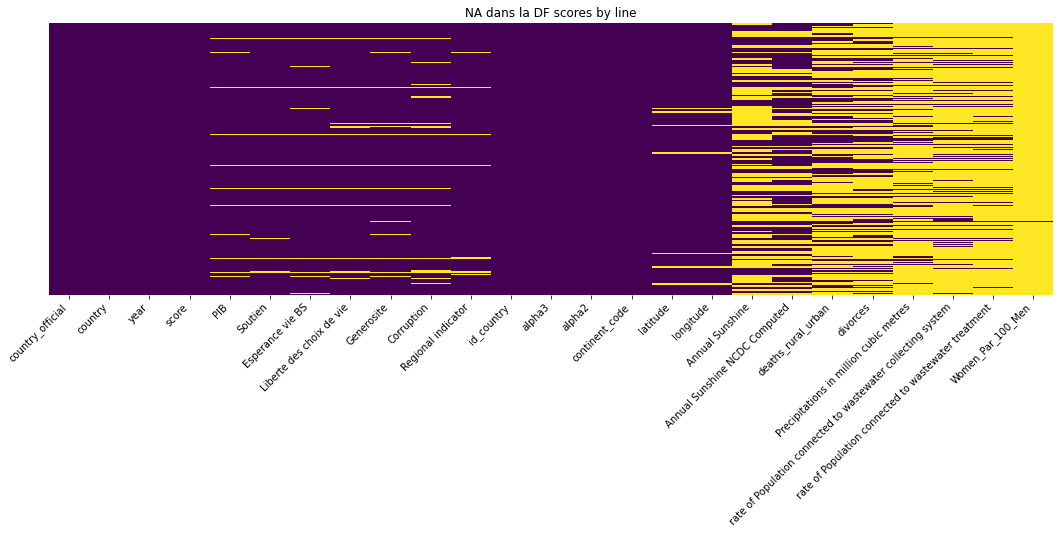

In [58]:
figure, ax = color_graph_background(1,1)
sns.heatmap(df_global_completed.isnull(), yticklabels=False,cbar=False, cmap='viridis')
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("NA dans la DF scores by line")
figure.set_size_inches(18, 5, forward=True)
plt.show()

In [59]:
not_proceed

{'world_GINI_by_Country.csv',
 'world_Intentional homicide victims NB.csv',
 'world_Population.csv',
 'world_Rural population.csv',
 'world_Unemployment rate.csv',
 'world_Urban population.csv'}

In [60]:
df_global_full = df_global_completed.copy()
excluded_cols=list(df_global_completed["year"].unique())

for world_file in not_proceed:
    if "GINI".lower() in world_file.lower():
        df_global_full, _ = load_world_gini_file(data_set_path, world_file, df_global_full,excluded_cols=excluded_cols, verbose=verbose)
    elif "homicide" in world_file.lower():
        df_global_full, _ = load_world_homicide_file(data_set_path, world_file, df_global_full,excluded_cols=excluded_cols, verbose=verbose)
    elif "population".lower() in world_file.lower():
        df_global_full, _ = load_world_population_file(data_set_path, world_file, df_global_full,excluded_cols=excluded_cols, verbose=verbose)
    elif "Unemployment.".lower() in world_file.lower():
        df_global_full = load_world_unemployment_file(data_set_path, world_file, df_global_full,excluded_cols=excluded_cols, verbose=verbose)

# df_global_full_clean = remove_na_columns(df_global_full, max_na=85, verbose=verbose, inplace=False)

Removed : {'1963', '1960', '1973', '1990', '1974', '1975', '1998', '2019', '1984', '1971', '1969', '1965', '2020', '1979', '1985', '1992', '1994', '1962', '1970', '1964', '1981', '1991', '1989', '1980', '1999', '1978', '1995', '2001', '1986', '1982', '1976', '1977', '1967', '1983', '1961', '1972', '1987', '1988', '1968', '1993', '1966', '1996', '1997'}
remove_na_columns, shape start:  (266, 65) => (266, 22) s............................................... END
(264, 22) données chargées ------> ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '2000', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']
Removed : set()
remove_na_columns, shape start:  (7781, 8) => (7781, 8) s............................................... END
(7636, 8) données chargées ------> ['Country or Area Code', 'Country or Area', 'Subgroup', 'Year', 'Source', 'Unit', 'Value', 'Value Footnotes']
GLOBAL DF ==>(2359

In [61]:
df_global_full.loc[(df_global_full['Country Code'] != df_global_full['alpha3']) & (df_global_full['Country Code'].notna()), ['country_official', 'country', 'Regional indicator', 'id_country', 'alpha3', 'alpha2',
       'continent_code', 'Country Code']]

,country_official,country,Regional indicator,id_country,alpha3,alpha2,continent_code,Country Code
2189,Republic of South Sudan,South Sudan,Sub-Saharan Africa,-1,SDS,SS,AF,SSD
2250,Kosovo,Kosovo,Central and Eastern Europe,-1,XXK,XK,EU,XKX
2233,Republic of South Sudan,South Sudan,Sub-Saharan Africa,-1,SDS,SS,AF,SSD
2248,Kosovo,Kosovo,Central and Eastern Europe,-1,XXK,XK,EU,XKX
2247,Republic of South Sudan,South Sudan,Sub-Saharan Africa,-1,SDS,SS,AF,SSD
2243,Kosovo,Kosovo,Central and Eastern Europe,-1,XXK,XK,EU,XKX
2236,Kosovo,Kosovo,Central and Eastern Europe,-1,XXK,XK,EU,XKX
2259,Kosovo,Kosovo,Central and Eastern Europe,-1,XXK,XK,EU,XKX
2254,Kosovo,Kosovo,Central and Eastern Europe,-1,XXK,XK,EU,XKX
2255,Republic of South Sudan,South Sudan,Sub-Saharan Africa,-1,SDS,SS,AF,SSD


In [62]:
df_global_full = df_global_full.drop("Country Code", axis=1)

In [63]:
df_global_full_clean = remove_na_columns(df_global_full, max_na=85, verbose=verbose, inplace=False)

0 => 8 ['country_official', 'country', 'year', 'score', 'id_country', 'alpha3', 'alpha2', 'continent_code']
3 => 3 ['PIB', 'Soutien', 'Regional indicator']
4 => 4 ['Esperance vie BS', 'Liberte des choix de vie', 'latitude', 'longitude']
6 => 1 ['Generosite']
7 => 1 ['Corruption']
37 => 1 ['Annual Sunshine NCDC Computed']
54 => 1 ['intentional homicide victims Female nb']
55 => 2 ['intentional homicide victims Male nb', 'Homicide victime nb']
56 => 2 ['Annual Sunshine', 'deaths_rural_urban']
59 => 1 ['divorces']
64 => 1 ['gini']
77 => 1 ['Precipitations in million cubic metres']
80 => 1 ['rate of Population connected to wastewater collecting system']
83 => 1 ['rate of Population connected to wastewater treatment']
98 => 4 ['Women_Par_100_Men', 'Female Population', 'Male Population', 'Population']
100 => 6 ['Rural Female Population', 'Rural Male Population', 'RuralPopulation', 'Urban Female Population', 'Urban Male Population', 'UrbanPopulation']
Removed : {'Women_Par_100_Men', 'Rural Ma

In [64]:
df_global_full_clean['continent_code'].value_counts()

AS    707
EU    620
AF    614
NA    212
SA    174
OC     32
Name: continent_code, dtype: int64

In [65]:
df_global_full_clean['Regional indicator'].value_counts()

Sub-Saharan Africa                    529
Latin America and Caribbean           342
Western Europe                        289
Central and Eastern Europe            261
Middle East and North Africa          255
Commonwealth of Independent States    199
Southeast Asia                        140
South Asia                            103
East Asia                              96
North America and ANZ                  66
Name: Regional indicator, dtype: int64

In [66]:
display(HTML(df_global_full_clean[df_global_full_clean["country_official"]=='French Republic'].head().to_html()))

,country_official,country,year,score,PIB,Soutien,Esperance vie BS,Liberte des choix de vie,Generosite,Corruption,Regional indicator,id_country,alpha3,alpha2,continent_code,latitude,longitude,Annual Sunshine,Annual Sunshine NCDC Computed,deaths_rural_urban,divorces,Precipitations in million cubic metres,rate of Population connected to wastewater collecting system,rate of Population connected to wastewater treatment,gini,intentional homicide victims Female nb,intentional homicide victims Male nb,Homicide victime nb
184,French Republic,France,2005,7.093,10.642,0.940,71.3,0.895,NaN,0.688,Western Europe,250,FRA,FR,EU,46.71109,1.719104,1831.9,1831.8,527533.0,152020.0,401743.00000,NaN,NaN,29.8,NaN,NaN,NaN
194,French Republic,France,2015,6.358,10.682,0.896,73.2,0.817,-0.139,0.641,Western Europe,250,FRA,FR,EU,46.71109,1.719104,1763.6,1763.6,581770.0,120731.0,429730.09375,NaN,NaN,32.7,381.0,630.0,21231.0
286,French Republic,France,2013,6.667,10.669,0.908,72.8,0.878,-0.125,0.699,Western Europe,250,FRA,FR,EU,46.71109,1.719104,1751.8,1751.7,558408.0,121849.0,578551.62500,82.099998,100.099998,32.5,NaN,NaN,NaN
300,French Republic,France,2012,6.649,10.669,0.937,72.6,0.841,-0.149,0.608,Western Europe,250,FRA,FR,EU,46.71109,1.719104,1651.5,1651.6,559227.0,125217.0,516008.31250,82.000000,100.000000,33.1,NaN,NaN,NaN
283,French Republic,France,2010,6.798,10.654,0.943,72.2,0.850,-0.104,0.623,Western Europe,250,FRA,FR,EU,46.71109,1.719104,2737.3,2740.1,540469.0,130810.0,502397.18750,82.000000,100.000000,33.7,NaN,NaN,NaN


In [67]:
df_global_full_clean = remove_na_columns(df_global_full, max_na=85, verbose=verbose, inplace=False)
# na_columns_class = get_na_columns_classement(df_global_full_clean, verbose=1)

0 => 8 ['country_official', 'country', 'year', 'score', 'id_country', 'alpha3', 'alpha2', 'continent_code']
3 => 3 ['PIB', 'Soutien', 'Regional indicator']
4 => 4 ['Esperance vie BS', 'Liberte des choix de vie', 'latitude', 'longitude']
6 => 1 ['Generosite']
7 => 1 ['Corruption']
37 => 1 ['Annual Sunshine NCDC Computed']
54 => 1 ['intentional homicide victims Female nb']
55 => 2 ['intentional homicide victims Male nb', 'Homicide victime nb']
56 => 2 ['Annual Sunshine', 'deaths_rural_urban']
59 => 1 ['divorces']
64 => 1 ['gini']
77 => 1 ['Precipitations in million cubic metres']
80 => 1 ['rate of Population connected to wastewater collecting system']
83 => 1 ['rate of Population connected to wastewater treatment']
98 => 4 ['Women_Par_100_Men', 'Female Population', 'Male Population', 'Population']
100 => 6 ['Rural Female Population', 'Rural Male Population', 'RuralPopulation', 'Urban Female Population', 'Urban Male Population', 'UrbanPopulation']
Removed : {'Women_Par_100_Men', 'Rural Ma

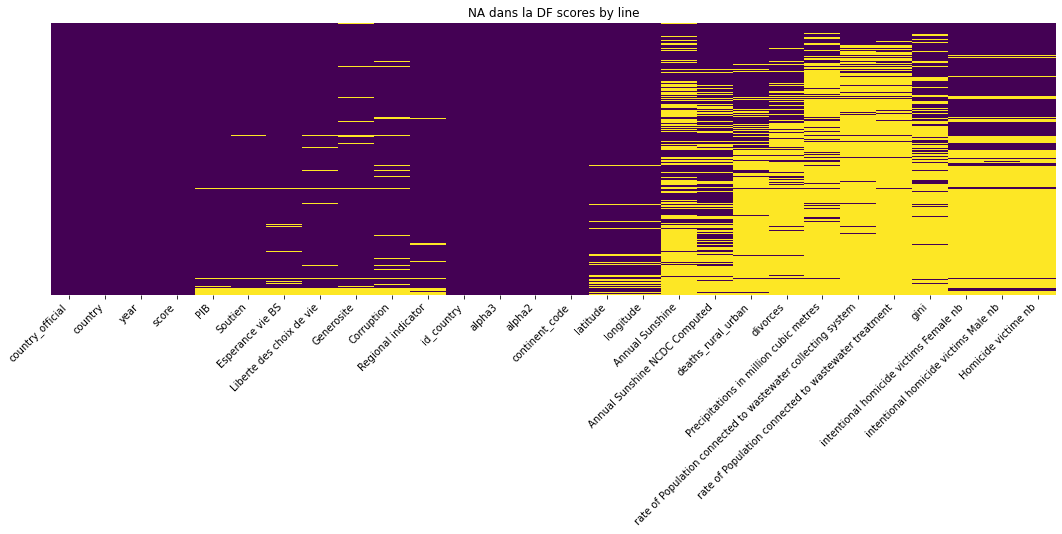

In [68]:
figure, ax = color_graph_background(1,1)
sns.heatmap(df_global_full_clean.isnull(), yticklabels=False,cbar=False, cmap='viridis')
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("NA dans la DF scores by line")
figure.set_size_inches(18, 5, forward=True)
plt.show()

<div style="display: flex; background-color: Blue; padding: 15px;" >

## 3.Sauvegarde des données
</div>

A ce stade on limite le nettoyage pour sauvegarder le fichier global

In [69]:
save_df_in_file(df_global_full_clean, file_path=data_set_path+"DATA_SET_FULL")

'c:\\Users\\User\\WORK\\workspace-ia\\PROJETS\\projet_bonheur_bed\\dataset\\DATA_SET_FULL__2022-04-08-17_48_20.csv'

<div style="display: flex; background-color: Blue; padding: 15px;" >

## Annexes
</div>

In [ ]:
just to fail

<div style="display: flex; background-color: Green; padding: 7px;" >

### Nettoyage des pays par année dans la DF 
</div>

In [ ]:
diff = df_origine_light[df_origine_light["2019-country_origin"] != df_origine_light["2019-country"]]
diff = diff[['country_official', 'Regional indicator', '2019-country_origin','2019-country',
       '2020-country_origin', '2020-country', '2021-country_origin', '2021-country', '2022-country_origin', '2022-country' ]]
print(diff[diff["2019-country"].notna()].shape)
diff[diff["2019-country"].notna()]

(6, 10)


,country_official,Regional indicator,2019-country_origin,2019-country,2020-country_origin,2020-country,2021-country_origin,2021-country,2022-country_origin,2022-country
8,Democratic Republic Of The Congo,Sub-Saharan Africa,Congo (Kinshasa),Democratic Republic of the Congo,Congo (Kinshasa),Democratic Republic of the Congo,NaN,NaN,NaN,NaN
24,Hong Kong Special Administrative Region of China,East Asia,Hong Kong,Hong Kong S.A.R. of China,Hong Kong S.A.R. of China,Hong Kong S.A.R. of China,Hong Kong S.A.R. of China,Hong Kong S.A.R. of China,Hong Kong S.A.R. of China,Hong Kong S.A.R. of China
40,Kingdom of Eswatini,Sub-Saharan Africa,Swaziland,Eswatini,Swaziland,Eswatini,Swaziland,Eswatini,Eswatini. Kingdom of,Eswatini
119,Republic of Trinidad and Tobago,Latin America and Caribbean,Trinidad & Tobago,Trinidad and Tobago,Trinidad and Tobago,Trinidad and Tobago,NaN,NaN,NaN,NaN
127,Republic of the Congo,Sub-Saharan Africa,Congo (Brazzaville),Republic of the Congo,Congo (Brazzaville),Republic of the Congo,Congo (Brazzaville),Republic of the Congo,Congo,Congo
131,Republic of the Sudan,Sub-Saharan Africa,South Sudan,Sudan,South Sudan,Sudan,NaN,NaN,NaN,NaN


In [ ]:
diff = df_origine_light[df_origine_light["2019-country_origin"] != df_origine_light["2020-country_origin"]]
diff = diff[['country_official', 'Regional indicator', '2019-country_origin',
       '2020-country_origin', '2019-country','2020-country', '2021-country_origin', '2021-country', '2022-country_origin', '2022-country' ]]
print(diff[diff["2019-country_origin"].notna() & diff["2020-country_origin"].notna()].shape)
diff[diff["2019-country_origin"].notna() & diff["2020-country_origin"].notna()]

(4, 10)


,country_official,Regional indicator,2019-country_origin,2020-country_origin,2019-country,2020-country,2021-country_origin,2021-country,2022-country_origin,2022-country
24,Hong Kong Special Administrative Region of China,East Asia,Hong Kong,Hong Kong S.A.R. of China,Hong Kong S.A.R. of China,Hong Kong S.A.R. of China,Hong Kong S.A.R. of China,Hong Kong S.A.R. of China,Hong Kong S.A.R. of China,Hong Kong S.A.R. of China
107,Republic of North Macedonia,Central and Eastern Europe,North Macedonia,Macedonia,North Macedonia,Macedonia,North Macedonia,North Macedonia,North Macedonia,North Macedonia
119,Republic of Trinidad and Tobago,Latin America and Caribbean,Trinidad & Tobago,Trinidad and Tobago,Trinidad and Tobago,Trinidad and Tobago,NaN,NaN,NaN,NaN
145,The Republic of Cyprus,Western Europe,Northern Cyprus,North Cyprus,Northern Cyprus,Northern Cyprus,North Cyprus,Northern Cyprus,North Cyprus,Northern Cyprus


In [ ]:
diff = df_origine_light[df_origine_light["2020-country_origin"] != df_origine_light["2021-country_origin"]]
diff = diff[['country_official', 'Regional indicator', 
       '2020-country_origin', '2021-country_origin', '2020-country', '2021-country', '2022-country_origin', '2022-country' ]]
print(diff[diff["2020-country_origin"].notna() & diff["2021-country_origin"].notna()].shape)
diff[diff["2020-country_origin"].notna() & diff["2021-country_origin"].notna()]

(1, 8)


,country_official,Regional indicator,2020-country_origin,2021-country_origin,2020-country,2021-country,2022-country_origin,2022-country
107,Republic of North Macedonia,Central and Eastern Europe,Macedonia,North Macedonia,Macedonia,North Macedonia,North Macedonia,North Macedonia


In [ ]:
diff = df_origine_light[df_origine_light["2021-country_origin"] != df_origine_light["2022-country_origin"]]
diff = diff[['country_official', 'Regional indicator', 
       '2021-country_origin', '2022-country_origin', '2021-country', '2022-country' ]]
print(diff[diff["2021-country_origin"].notna() & diff["2022-country_origin"].notna()].shape)
diff[diff["2021-country_origin"].notna() & diff["2022-country_origin"].notna()]

(3, 6)


,country_official,Regional indicator,2021-country_origin,2022-country_origin,2021-country,2022-country
7,Czech Republic,Central and Eastern Europe,Czech Republic,Czechia,Czech Republic,Czech Republic
40,Kingdom of Eswatini,Sub-Saharan Africa,Swaziland,Eswatini. Kingdom of,Eswatini,Eswatini
127,Republic of the Congo,Sub-Saharan Africa,Congo (Brazzaville),Congo,Republic of the Congo,Congo


In [ ]:
diff = df_origine_light[df_origine_light["2020-country_origin"] != df_origine_light["2020-country"]]
diff = diff[['country_official', 'Regional indicator', '2019-country_origin','2019-country',
       '2020-country_origin', '2020-country', '2021-country_origin', '2021-country', '2022-country_origin', '2022-country' ]]
print(diff[diff["2020-country"].notna()].shape)
diff[diff["2020-country"].notna()]

(6, 10)


,country_official,Regional indicator,2019-country_origin,2019-country,2020-country_origin,2020-country,2021-country_origin,2021-country,2022-country_origin,2022-country
8,Democratic Republic Of The Congo,Sub-Saharan Africa,Congo (Kinshasa),Democratic Republic of the Congo,Congo (Kinshasa),Democratic Republic of the Congo,NaN,NaN,NaN,NaN
40,Kingdom of Eswatini,Sub-Saharan Africa,Swaziland,Eswatini,Swaziland,Eswatini,Swaziland,Eswatini,Eswatini. Kingdom of,Eswatini
156,Republic of China,East Asia,NaN,NaN,Taiwan Province of China,Republic of China,Taiwan Province of China,Republic of China,Taiwan Province of China,Republic of China
127,Republic of the Congo,Sub-Saharan Africa,Congo (Brazzaville),Republic of the Congo,Congo (Brazzaville),Republic of the Congo,Congo (Brazzaville),Republic of the Congo,Congo,Congo
131,Republic of the Sudan,Sub-Saharan Africa,South Sudan,Sudan,South Sudan,Sudan,NaN,NaN,NaN,NaN
145,The Republic of Cyprus,Western Europe,Northern Cyprus,Northern Cyprus,North Cyprus,Northern Cyprus,North Cyprus,Northern Cyprus,North Cyprus,Northern Cyprus


In [ ]:
diff = df_origine_light_completed2[df_origine_light_completed2["2020-country_origin"] != df_origine_light_completed2["country_origin"]]
diff = diff[['country_official', 'Regional indicator', 'country_origin','country',
       '2020-country_origin' ]]
diff

,country_official,Regional indicator,country_origin,country,2020-country_origin
16,Federal Republic of Somalia,NaN,Somalia,Somalia,NaN
24,Hong Kong Special Administrative Region of China,East Asia,Hong Kong,Hong Kong S.A.R. of China,Hong Kong S.A.R. of China
37,Kingdom of Bhutan,NaN,Bhutan,Bhutan,NaN
107,Republic of North Macedonia,Central and Eastern Europe,North Macedonia,North Macedonia,Macedonia
119,Republic of Trinidad and Tobago,Latin America and Caribbean,Trinidad & Tobago,Trinidad and Tobago,Trinidad and Tobago
140,State of Qatar,NaN,Qatar,Qatar,NaN
142,Syria,NaN,Syria,Syria,NaN
143,Taiwan,NaN,Taiwan,Taiwan,NaN
145,The Republic of Cyprus,Western Europe,Northern Cyprus,Northern Cyprus,North Cyprus


In [ ]:
try:
    df_origine_light_completed2 = df_origine_light_completed2.drop("2020-country_origin", axis=1)
except:
    pass
diff = df_origine_light_completed2[df_origine_light_completed2["2021-country_origin"] != df_origine_light_completed2["country_origin"]]
diff = diff[['country_official', 'Regional indicator', 'country_origin','country',
       '2021-country_origin' ]]
diff

,country_official,Regional indicator,country_origin,country,2021-country_origin
6,Central African Republic,Sub-Saharan Africa,Central African Republic,Central African Republic,NaN
8,Democratic Republic Of The Congo,Sub-Saharan Africa,Congo (Kinshasa),Democratic Republic of the Congo,NaN
16,Federal Republic of Somalia,NaN,Somalia,Somalia,NaN
24,Hong Kong Special Administrative Region of China,East Asia,Hong Kong,Hong Kong S.A.R. of China,Hong Kong S.A.R. of China
37,Kingdom of Bhutan,NaN,Bhutan,Bhutan,NaN
119,Republic of Trinidad and Tobago,Latin America and Caribbean,Trinidad & Tobago,Trinidad and Tobago,NaN
131,Republic of the Sudan,Sub-Saharan Africa,South Sudan,Sudan,NaN
140,State of Qatar,NaN,Qatar,Qatar,NaN
142,Syria,NaN,Syria,Syria,NaN
143,Taiwan,NaN,Taiwan,Taiwan,NaN


In [ ]:
try:
    df_origine_light_completed2 = df_origine_light_completed2.drop("2021-country_origin", axis=1)
except:
    pass
diff = df_origine_light_completed2[df_origine_light_completed2["2022-country_origin"] != df_origine_light_completed2["country_origin"]]
diff = diff[['country_official', 'Regional indicator', 'country_origin','country',
       '2022-country_origin' ]]
diff

,country_official,Regional indicator,country_origin,country,2022-country_origin
6,Central African Republic,Sub-Saharan Africa,Central African Republic,Central African Republic,NaN
7,Czech Republic,Central and Eastern Europe,Czech Republic,Czech Republic,Czechia
8,Democratic Republic Of The Congo,Sub-Saharan Africa,Congo (Kinshasa),Democratic Republic of the Congo,NaN
16,Federal Republic of Somalia,NaN,Somalia,Somalia,NaN
24,Hong Kong Special Administrative Region of China,East Asia,Hong Kong,Hong Kong S.A.R. of China,Hong Kong S.A.R. of China
37,Kingdom of Bhutan,NaN,Bhutan,Bhutan,NaN
40,Kingdom of Eswatini,Sub-Saharan Africa,Swaziland,Eswatini,Eswatini. Kingdom of
72,Republic of Burundi,Sub-Saharan Africa,Burundi,Burundi,NaN
87,Republic of Haiti,Latin America and Caribbean,Haiti,Haiti,NaN
157,Republic of Maldives,South Asia,Maldives,Maldives,NaN


In [ ]:
col = "2020-country"
diff = df_origine_light_completed2[df_origine_light_completed2[col] != df_origine_light_completed2["country"]]
diff = diff[['country_official', 'Regional indicator', 'country_origin','country', col ]]
diff

,country_official,Regional indicator,country_origin,country,2020-country
16,Federal Republic of Somalia,NaN,Somalia,Somalia,NaN
37,Kingdom of Bhutan,NaN,Bhutan,Bhutan,NaN
107,Republic of North Macedonia,Central and Eastern Europe,North Macedonia,North Macedonia,Macedonia
140,State of Qatar,NaN,Qatar,Qatar,NaN
142,Syria,NaN,Syria,Syria,NaN
143,Taiwan,NaN,Taiwan,Taiwan,NaN


In [ ]:
col = "2021-country"
diff = df_origine_light_completed2[df_origine_light_completed2[col] != df_origine_light_completed2["country"]]
diff = diff[['country_official', 'Regional indicator', 'country_origin','country', col ]]
diff

,country_official,Regional indicator,country_origin,country,2021-country
6,Central African Republic,Sub-Saharan Africa,Central African Republic,Central African Republic,NaN
8,Democratic Republic Of The Congo,Sub-Saharan Africa,Congo (Kinshasa),Democratic Republic of the Congo,NaN
16,Federal Republic of Somalia,NaN,Somalia,Somalia,NaN
37,Kingdom of Bhutan,NaN,Bhutan,Bhutan,NaN
119,Republic of Trinidad and Tobago,Latin America and Caribbean,Trinidad & Tobago,Trinidad and Tobago,NaN
131,Republic of the Sudan,Sub-Saharan Africa,South Sudan,Sudan,NaN
140,State of Qatar,NaN,Qatar,Qatar,NaN
142,Syria,NaN,Syria,Syria,NaN
143,Taiwan,NaN,Taiwan,Taiwan,NaN


In [ ]:
col = "2022-country"
diff = df_origine_light_completed2[df_origine_light_completed2[col] != df_origine_light_completed2["country"]]
diff = diff[['country_official', 'Regional indicator', 'country_origin','country', col ]]
diff

,country_official,Regional indicator,country_origin,country,2022-country
6,Central African Republic,Sub-Saharan Africa,Central African Republic,Central African Republic,NaN
8,Democratic Republic Of The Congo,Sub-Saharan Africa,Congo (Kinshasa),Democratic Republic of the Congo,NaN
16,Federal Republic of Somalia,NaN,Somalia,Somalia,NaN
37,Kingdom of Bhutan,NaN,Bhutan,Bhutan,NaN
72,Republic of Burundi,Sub-Saharan Africa,Burundi,Burundi,NaN
87,Republic of Haiti,Latin America and Caribbean,Haiti,Haiti,NaN
157,Republic of Maldives,South Asia,Maldives,Maldives,NaN
119,Republic of Trinidad and Tobago,Latin America and Caribbean,Trinidad & Tobago,Trinidad and Tobago,NaN
127,Republic of the Congo,Sub-Saharan Africa,Congo (Brazzaville),Republic of the Congo,Congo
131,Republic of the Sudan,Sub-Saharan Africa,South Sudan,Sudan,NaN


In [ ]:
df_origine_light_completed2[df_origine_light_completed2["country_origin"]!=df_origine_light_completed2["country"]]

,country_official,Regional indicator,country_origin,country,2019-rank,2022,2021,2020,2019,2019-PIB,...,2022-rank,2022-Whisker-high,2022-Whisker-low,2022-Dystopia + residual,2022-PIB,2022-Soutien,2022-Esperance vie BS,2022-Liberte des choix de vie,2022-Generosite,2022-Corruption
8,Democratic Republic Of The Congo,Sub-Saharan Africa,Congo (Kinshasa),Democratic Republic of the Congo,127.0,NaN,NaN,4.311,4.418,0.094,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,Hong Kong Special Administrative Region of China,East Asia,Hong Kong,Hong Kong S.A.R. of China,76.0,5.425,5.477,5.510,5.430,1.438,...,81.0,5.501,5.348,0.642,1.957,0.954,0.942,0.400,0.147,0.383
40,Kingdom of Eswatini,Sub-Saharan Africa,Swaziland,Eswatini,135.0,4.396,4.308,4.308,4.212,0.811,...,125.0,4.607,4.185,1.688,1.274,0.786,0.197,0.259,0.038,0.154
156,Republic of China,East Asia,Taiwan Province of China,Republic of China,NaN,6.512,6.584,6.455,NaN,NaN,...,26.0,6.596,6.429,2.002,1.897,1.095,0.733,0.542,0.075,0.168
119,Republic of Trinidad and Tobago,Latin America and Caribbean,Trinidad & Tobago,Trinidad and Tobago,39.0,NaN,NaN,6.192,6.192,1.231,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,Republic of the Congo,Sub-Saharan Africa,Congo (Brazzaville),Republic of the Congo,103.0,5.075,5.342,5.194,4.812,0.673,...,99.0,5.235,4.915,2.658,0.950,0.405,0.355,0.431,0.130,0.146
131,Republic of the Sudan,Sub-Saharan Africa,South Sudan,Sudan,156.0,NaN,NaN,2.817,2.853,0.306,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div style="display: flex; background-color: Green; padding: 7px;" >

### Nettoyage des données suite fusion avec les fichiers d'évolution des scores par année
</div>

In [ ]:
col1 = '2019'
col2 = 'score_'+col1

diff = df_light_merged[(df_light_merged[col1] != df_light_merged[col2]) & (df_light_merged[col2].notna()) & (df_light_merged[col1].notna())]
print(diff.shape)
diff[['country_official', 'country_origin', 'Regional indicator',
       'country_FR', col1, col2,'_merge']]

(3, 50)


,country_official,country_origin,Regional indicator,country_FR,2019,score_2019,_merge
131,Republic of the Congo,Congo (Brazzaville),Sub-Saharan Africa,Congo (RDC),4.812,4.418,both
140,Slovak Republic,Slovakia,Central and Eastern Europe,Slovénie,6.198,6.118,both
143,State of Kuwait,Kuwait,Middle East and North Africa,Koweït,6.021,6.011,both


In [ ]:
col1 = '2020'
col2 = 'score_'+col1

diff = df_light_merged[(df_light_merged[col1] != df_light_merged[col2]) & (df_light_merged[col2].notna()) & (df_light_merged[col1].notna())]
print(diff.shape)
diff[['country_official', 'country_origin', 'Regional indicator',
       'country_FR', col1, col2,'_merge']]

(2, 50)


,country_official,country_origin,Regional indicator,country_FR,2020,score_2020,_merge
131,Republic of the Congo,Congo (Brazzaville),Sub-Saharan Africa,Congo (RDC),5.194,4.311,both
140,Slovak Republic,Slovakia,Central and Eastern Europe,Slovénie,6.281,6.363,both
